In [37]:
import pandas as pd
from scipy.stats import kurtosis, skew
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.cluster import KMeans, SpectralClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [18]:
bajar_monte = pd.read_csv("./Data/bajar_monte.csv")
subir_monte = pd.read_csv("./Data/subir_monte.csv")
bici = pd.read_csv("./Data/bici.csv")
coche = pd.read_csv("./Data/coche.csv")

df_list = [bajar_monte, subir_monte, bici, coche]

In [19]:
window_size = 200 
step_size = 100    

new_df_list = []

In [20]:
for df in df_list:
    num_windows = (len(df) - window_size) // step_size + 1
    window_features = []

    for i in range(num_windows):
        start_index = i * step_size
        end_index = start_index + window_size
        
        window_data = df.iloc[start_index:end_index]
        
        time_features = {
            "mean_x": window_data["Linear Acceleration x (m/s^2)"].mean(),
            "mean_y": window_data["Linear Acceleration y (m/s^2)"].mean(),
            "mean_z": window_data["Linear Acceleration z (m/s^2)"].mean(),
            "std_x": window_data["Linear Acceleration x (m/s^2)"].std(),
            "std_y": window_data["Linear Acceleration y (m/s^2)"].std(),
            "std_z": window_data["Linear Acceleration z (m/s^2)"].std(),
            "kurtosis_x": kurtosis(window_data["Linear Acceleration x (m/s^2)"]),
            "kurtosis_y": kurtosis(window_data["Linear Acceleration y (m/s^2)"]),
            "kurtosis_z": kurtosis(window_data["Linear Acceleration z (m/s^2)"]),
            "skewness_x": skew(window_data["Linear Acceleration x (m/s^2)"]),
            "skewness_y": skew(window_data["Linear Acceleration y (m/s^2)"]),
            "skewness_z": skew(window_data["Linear Acceleration z (m/s^2)"]),
            "min_x": window_data["Linear Acceleration x (m/s^2)"].min(),
            "min_y": window_data["Linear Acceleration y (m/s^2)"].min(),
            "min_z": window_data["Linear Acceleration z (m/s^2)"].min(),
            "max_x": window_data["Linear Acceleration x (m/s^2)"].max(),
            "max_y": window_data["Linear Acceleration y (m/s^2)"].max(),
            "max_z": window_data["Linear Acceleration z (m/s^2)"].max(),
         }
        
        window_features.append(time_features)

    window_features_df = pd.DataFrame(window_features)
    new_df_list.append(window_features_df)

In [21]:
actividades = ["bajar_monte", "subir_monte", "bici", "coche"]

for i, df in enumerate(new_df_list):
    df["actividad"] = actividades[i]

bajar_monte_features = new_df_list[0]
subir_monte_features = new_df_list[1]
bici_features = new_df_list[2]
coche_features = new_df_list[3]
coche_features.head()

,mean_x,mean_y,mean_z,std_x,std_y,std_z,kurtosis_x,kurtosis_y,kurtosis_z,skewness_x,skewness_y,skewness_z,min_x,min_y,min_z,max_x,max_y,max_z,actividad
0,2.939760,1.380682,-0.351700,1.195470,1.307523,2.544733,1.446567,0.594830,27.360294,-0.610877,0.058497,3.641471,-1.177641,-2.719264,-7.741281,5.564619,5.817110,19.653058,coche
1,1.937940,1.439263,-0.590034,1.062873,0.906624,1.154528,-1.275412,1.053843,5.086154,-0.002898,-1.008841,1.052415,-0.082416,-1.835580,-3.985637,4.528767,3.222953,5.037753,coche
2,0.382589,0.887331,-0.308989,0.705206,0.720326,1.096540,-0.816708,1.597533,5.602098,0.476023,-0.613086,0.768135,-0.795022,-1.835580,-3.985637,2.166395,2.533953,5.037753,coche
3,-0.460872,0.462740,-0.128701,0.328395,0.524016,0.636115,-0.670637,-0.281135,1.844238,-0.123555,0.267024,0.080604,-1.406132,-0.961183,-2.234673,0.155898,1.861427,2.061978,coche
4,-0.372174,0.045100,-0.016175,0.442054,0.366411,0.514683,-0.164744,-0.108337,-0.242846,0.522382,0.027203,0.023163,-1.406132,-0.904071,-1.398041,0.754660,1.103501,1.329477,coche


In [27]:
all_features = pd.concat([bajar_monte_features, subir_monte_features, bici_features, coche_features], ignore_index=True)

In [28]:
X = all_features.drop(columns=['actividad'])
y = all_features['actividad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

clf_predictions = clf.predict(X_test)
print(classification_report(y_test, clf_predictions))
print(confusion_matrix(y_test, clf_predictions))

              precision    recall  f1-score   support

 bajar_monte       0.90      0.93      0.92       462
        bici       0.89      0.95      0.92        78
       coche       0.98      1.00      0.99       169
 subir_monte       0.92      0.86      0.89       367

    accuracy                           0.92      1076
   macro avg       0.92      0.93      0.93      1076
weighted avg       0.92      0.92      0.92      1076

[[431   6   0  25]
 [  0  74   3   1]
 [  0   0 169   0]
 [ 49   3   1 314]]


In [30]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

svm_predictions = svm_classifier.predict(X_test)
print(classification_report(y_test, svm_predictions))
print(confusion_matrix(y_test, svm_predictions))

              precision    recall  f1-score   support

 bajar_monte       0.84      0.90      0.87       462
        bici       0.95      0.94      0.94        78
       coche       0.97      1.00      0.99       169
 subir_monte       0.87      0.78      0.82       367

    accuracy                           0.88      1076
   macro avg       0.91      0.90      0.91      1076
weighted avg       0.88      0.88      0.88      1076

[[416   3   0  43]
 [  0  73   5   0]
 [  0   0 169   0]
 [ 79   1   0 287]]


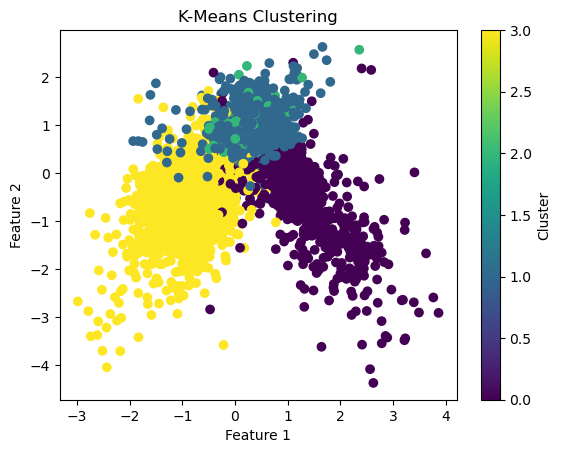

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()